This experiment demonstrates how adding increasing levels of Gaussian noise to a mixture of three Gaussians affects the data distribution, visualized through Empirical Cumulative Distribution Functions (ECDFs). The results show that as noise increases (σ from 1 to 8), the distinct steps in the ECDF (representing the original mixture components) gradually smooth out, illustrating how noise fills the low-density regions between mixture components but also corrupts the original data structure.

In [11]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple

In [12]:
def ecdf(data: torch.Tensor) -> Tuple[np.ndarray, np.ndarray]:
    """Compute empirical cumulative distribution function."""
    x_sorted = torch.sort(data)[0]
    y = torch.linspace(0, 1, len(x_sorted))
    return x_sorted.numpy(), y.numpy()

In [4]:
def noise(data: torch.Tensor, scale: float) -> torch.Tensor:
    """Add Gaussian noise to data with given scale."""
    draw = torch.randn_like(data) * scale
    return data + draw

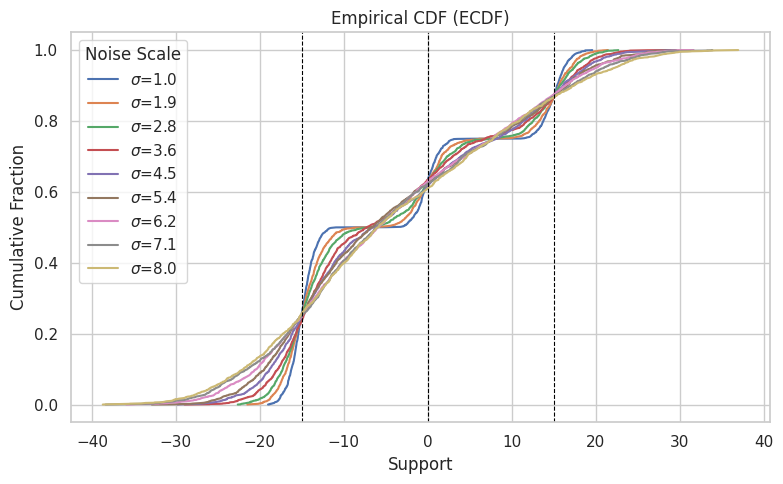

In [10]:
# Set random seed for reproducibility
torch.manual_seed(45)

# Define locations for the mixture components
locations = [-15, 0, 15]

# Create mixture of Gaussians
mix1 = torch.randn(1000) * 1 + locations[0]
mix2 = torch.randn(500) * 1 + locations[1]
mix3 = torch.randn(500) * 1 + locations[2]

# Combine the mixtures
data = torch.cat([mix1, mix2, mix3]).reshape(-1, 1)

# Create noise scales
noise_scale = torch.linspace(1, 8, 9)

# Create perturbed versions of the data
data_perturbed = torch.stack([
    noise(data, scale) for scale in noise_scale
])
# Shape: (num_noise_scales, num_samples, data_dim)

# Plot ECDFs for perturbed data
plt.figure(figsize=(8, 5))

for row, scale in zip(data_perturbed, noise_scale):
    x, y = ecdf(row.flatten())  # Remove .numpy() since ecdf expects torch.Tensor
    plt.plot(x, y, label=f"$\sigma$={scale:.1f}")

for loc in locations:
    plt.axvline(loc, color="black", ls="--", lw=0.8)

plt.legend(title="Noise Scale")
plt.xlabel("Support")
plt.ylabel("Cumulative Fraction")
plt.title("Empirical CDF (ECDF)")
plt.tight_layout()
plt.show()